# Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('pokemon.csv')

In [3]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           742 non-null    int64 
 1   Name        742 non-null    object
 2   Type 1      742 non-null    object
 3   Type 2      368 non-null    object
 4   Total       742 non-null    int64 
 5   HP          742 non-null    int64 
 6   Attack      742 non-null    int64 
 7   Defense     742 non-null    int64 
 8   Sp. Atk     742 non-null    int64 
 9   Sp. Def     742 non-null    int64 
 10  Speed       742 non-null    int64 
 11  Generation  742 non-null    int64 
 12  Legendary   742 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 70.4+ KB


In [5]:
map_legend = {
    True : 1,
    False : 0
}

In [6]:
df['Legendary'] = df['Legendary'].map(map_legend)

In [7]:
df['Legendary']

0      0
1      0
2      0
3      0
4      0
      ..
737    1
738    1
739    1
740    1
741    1
Name: Legendary, Length: 742, dtype: int64

In [8]:
df.drop(['#','Name','Type 1','Type 2'], axis=1, inplace=True)

In [ ]:
sns.pairplot(df, hue='Legendary')

<Axes: >

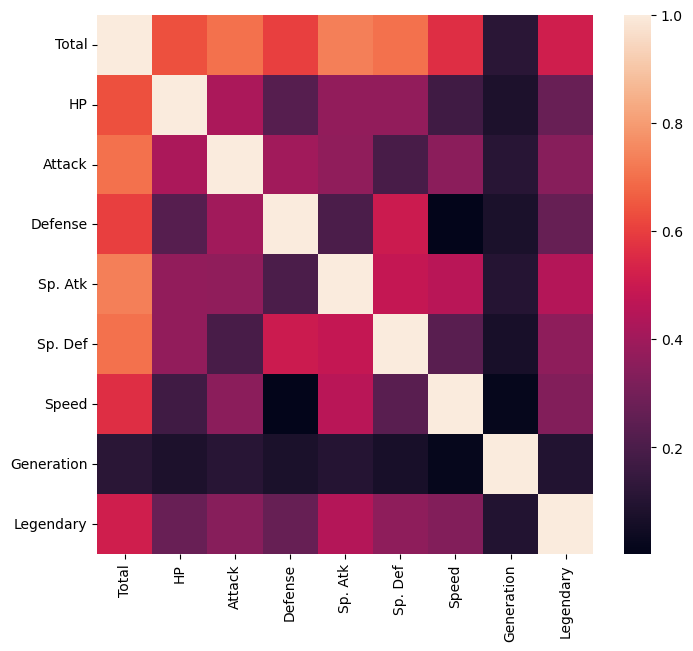

In [10]:
plt.figure(figsize=(8,7))
sns.heatmap(df.corr())

<Axes: >

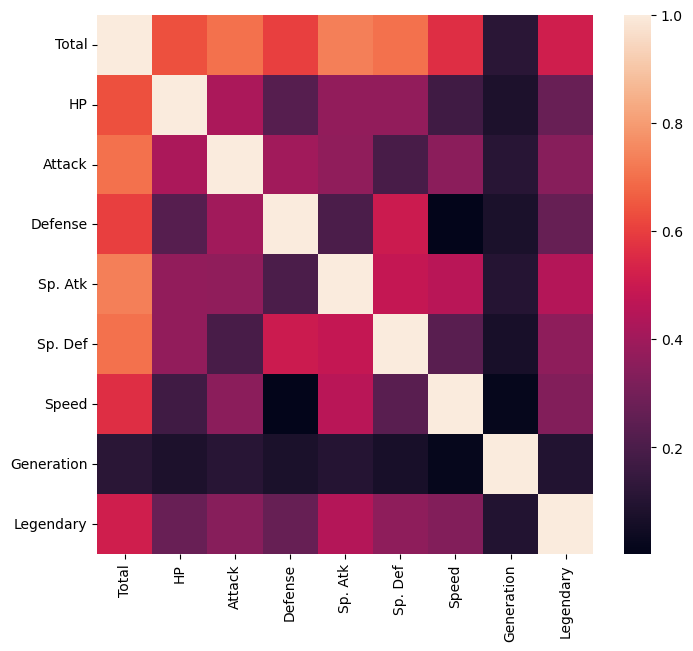

In [11]:
plt.figure(figsize=(8,7))
sns.heatmap(df.corr())

<Axes: xlabel='Total', ylabel='Legendary'>

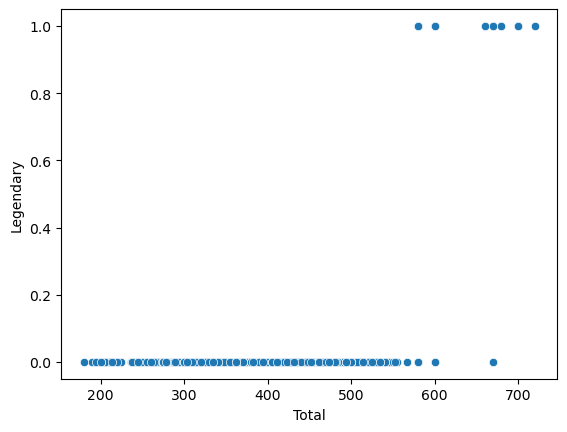

In [12]:
sns.scatterplot(x='Total', y='Legendary',data=df)

<Axes: xlabel='HP', ylabel='Legendary'>

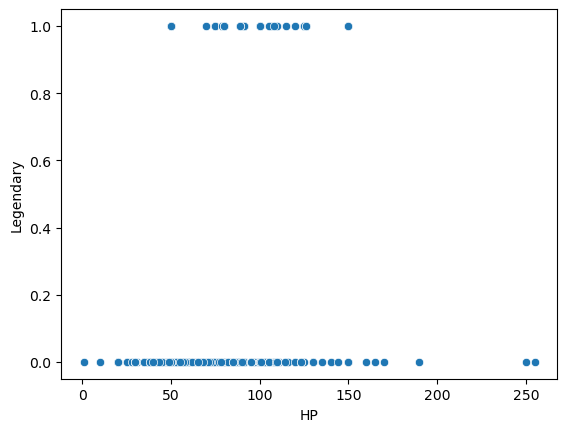

In [13]:
sns.scatterplot(x='HP', y='Legendary',data=df)

# Train Test Split

In [14]:
X = df.drop('Legendary', axis=1)
y = df['Legendary']

In [15]:
X.iloc[3:8]

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
3,309,39,52,43,60,50,65,1
4,405,58,64,58,80,65,80,1
5,534,78,84,78,109,85,100,1
6,314,44,48,65,50,64,43,1
7,405,59,63,80,65,80,58,1


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
from sklearn.preprocessing import StandardScaler

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=9)

In [39]:
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)


# Model Kurma

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
log_model = LogisticRegression()

In [42]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [43]:
log_model.coef_[0]

array([ 1.56442082, -0.19733289,  0.96006044,  1.27674102,  1.44232266,
        1.14089132,  1.44467002, -0.03855335])

In [44]:
coef = pd.Series(index = X.columns, data=log_model.coef_[0])

In [45]:
coef.sort_values(inplace=True)

<Axes: >

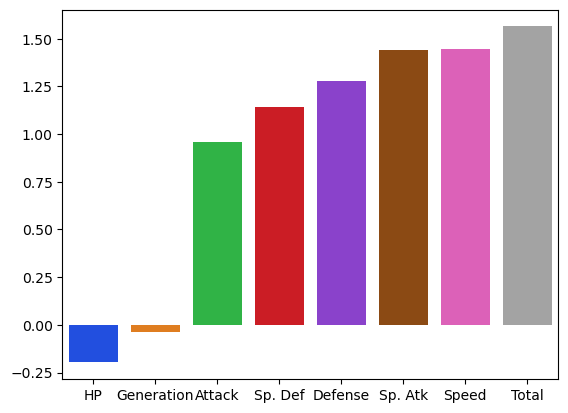

In [46]:
sns.barplot(x=coef.index, y=coef.values, palette='bright')

## Performans

In [47]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report, confusion_matrix

In [48]:
legend_pred = log_model.predict(scaled_X_test)

In [49]:
accuracy_score(y_test, legend_pred)

0.968609865470852

In [50]:
confusion_matrix(y_test, legend_pred)

array([[204,   3],
       [  4,  12]])

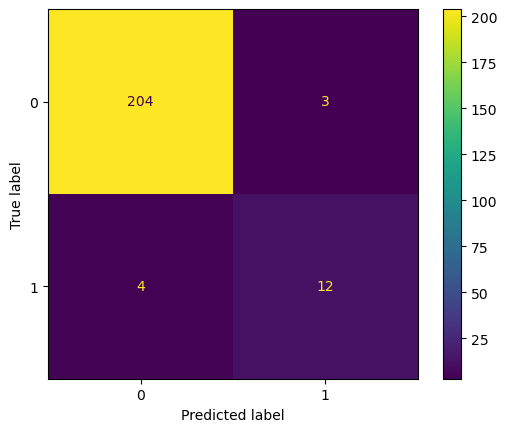

In [51]:
ConfusionMatrixDisplay.from_estimator(log_model, scaled_X_test, y_test)

In [52]:
print(classification_report(y_test, legend_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       207
           1       0.80      0.75      0.77        16

    accuracy                           0.97       223
   macro avg       0.89      0.87      0.88       223
weighted avg       0.97      0.97      0.97       223



In [53]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

In [56]:
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

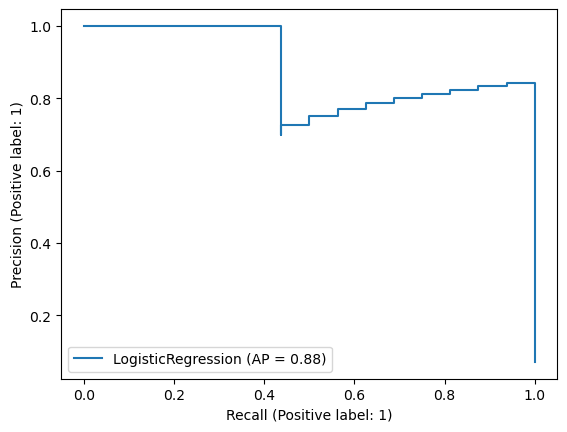

In [57]:
PrecisionRecallDisplay.from_estimator(log_model, scaled_X_test, y_test)

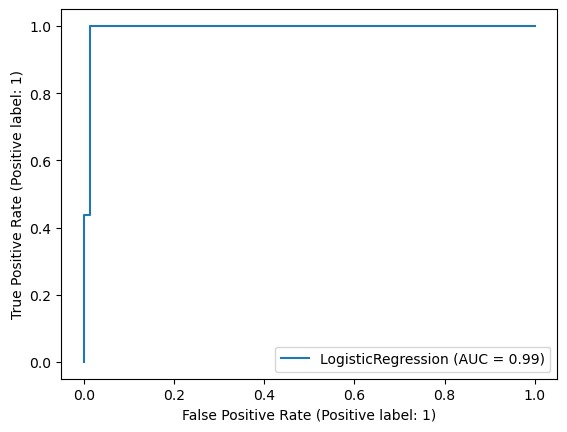

In [58]:
RocCurveDisplay.from_estimator(log_model, scaled_X_test, y_test)

## Deneme ve Hatalı Pokeler

In [59]:
df.max()

Total         720
HP            255
Attack        180
Defense       230
Sp. Atk       180
Sp. Def       230
Speed         180
Generation      6
Legendary       1
dtype: int64

In [77]:
poke_1 = [[420,100,80,100,100,100,100,2]]
poke_scaled_1 = scaler.transform(poke_1)
log_model.predict(poke_scaled_1)

/Users/oguzmetekaya/anaconda3/envs/ladof/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])

In [78]:
log_model.predict_proba(poke_scaled_1)[0,1]*100

4.642321711674104

In [79]:
wrong = (y_test!= legend_pred)

In [80]:
wrong

637    False
91     False
302    False
281    False
30     False
       ...  
670    False
671    False
705    False
606    False
710    False
Name: Legendary, Length: 223, dtype: bool

In [81]:
wrong_df = pd.DataFrame(wrong)

In [82]:
wrong_df

,Legendary
637,False
91,False
302,False
281,False
30,False
...,...
670,False
671,False
705,False
606,False


In [84]:
wrong_df[wrong_df['Legendary'] == True]

,Legendary
667,True
649,True
489,True
737,True
725,True
651,True
646,True


In [85]:
df.loc[[667,737]]

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
667,600,71,120,95,120,95,99,5,0
737,600,108,100,121,81,95,95,6,1


<Axes: >

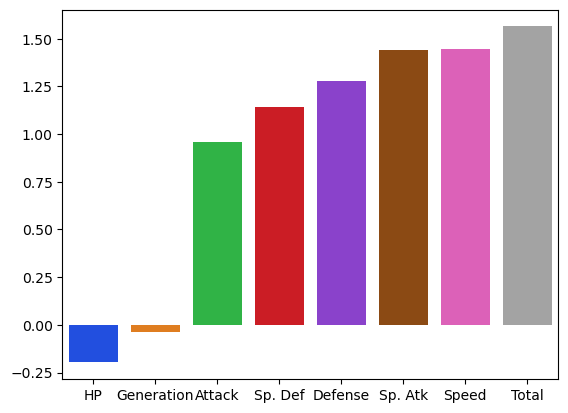

In [87]:
sns.barplot(x=coef.index, y=coef.values, palette='bright')